In [1]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# if running in Colab, import tutorial data
import sys
plt.rcParams["font.family"] = "arial"

In [2]:
pwd!

'/Users/lmartin/Documents/2025/Rapid_Autopsy_Convergent_Evolution/Figure2/Extended_Data_PrePost_Comut'

In [3]:
pre_post_comut = comut.CoMut()

In [4]:
dark_12 = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors

set_1 = palettable.colorbrewer.qualitative.Set1_9.mpl_colors

curl = palettable.cmocean.diverging.Curl_7.mpl_colors

prism_10 = palettable.cartocolors.qualitative.Prism_10.mpl_colors

Set3 = palettable.colorbrewer.qualitative.Set3_8.mpl_colors


{'Mutation type': <Axes: >, 'Mutated samples': <Axes: xlabel='Mutated samples'>, 'Purity': <Axes: >, 'Location': <Axes: >, 'Mutational signatures': <Axes: ylabel='Mutational\nsignatures'>, 'Mutation clonality': <Axes: ylabel='Clonality'>}


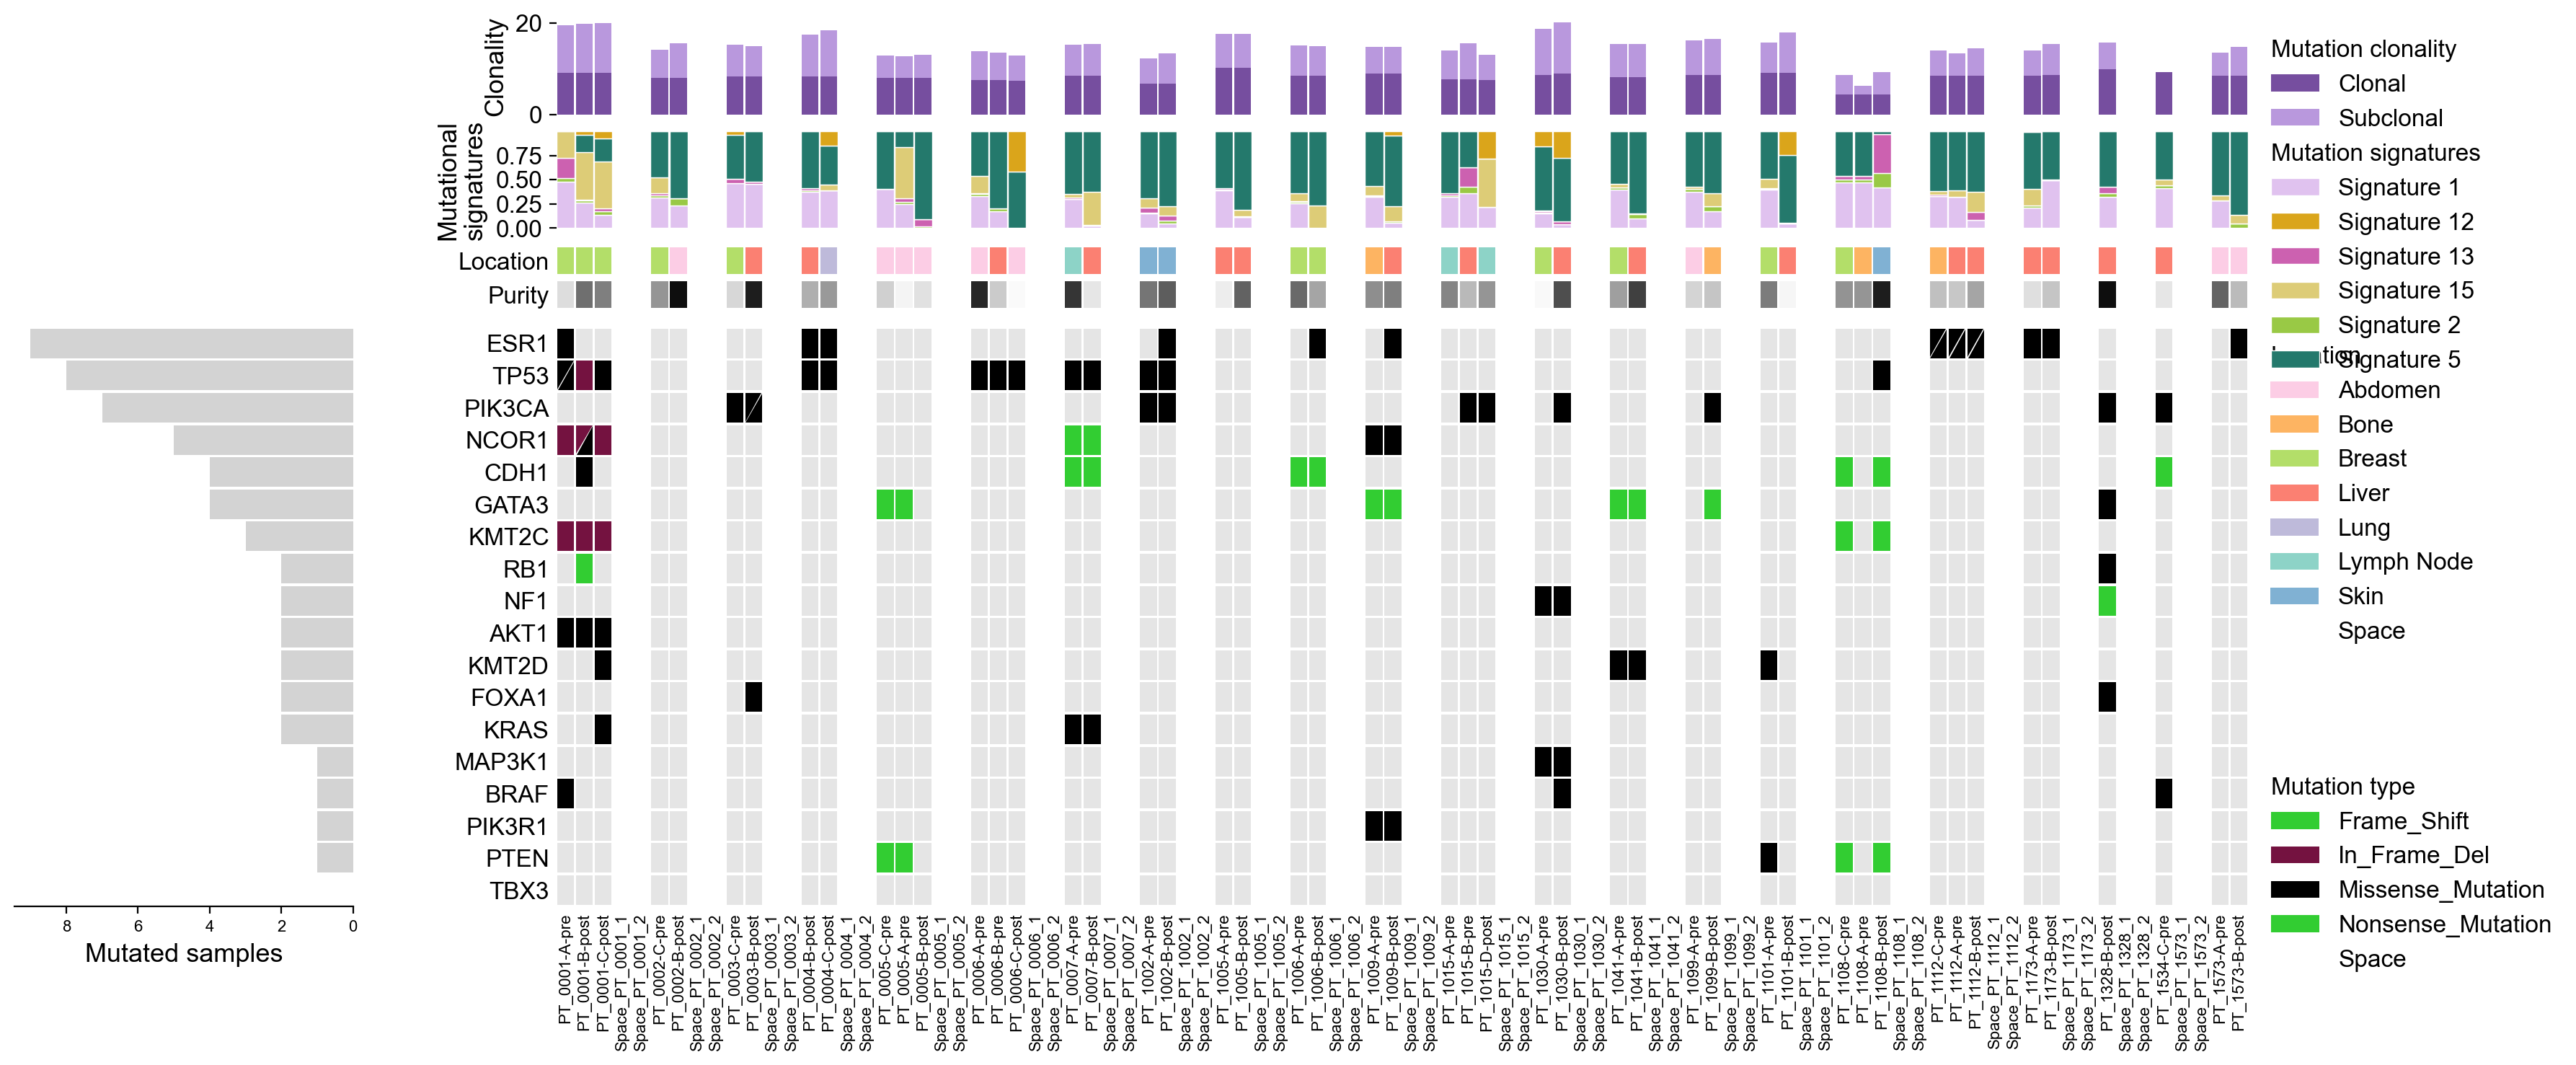

In [10]:
#import data
mutation_data = pd.read_csv("only_pre_post_mut_data_24_filtered_spaces.tsv", sep='\t')
purity_data = pd.read_csv("only_pre_post_purity.tsv", sep='\t')
location_data = pd.read_csv("only_pre_post_location_data.tsv", sep='\t')
#group_patient_data = pd.read_csv("all_cdk4_patients_as_bar_more_genes.tsv", sep='\t')

mutation_burden_data = pd.read_csv("only_pre_post_clonality.tsv", sep='\t')
mutation_sigs_data = pd.read_csv("prepost_sigs_by_sample_040524_for_comut.tsv", sep='\t')
mutation_freq_data = pd.read_csv('prevalence_in_post.tsv',sep='\t')

#copy_number_data = pd.read_csv("only_pre_post_cn_data.tsv",sep='\t')

#determine order

sample_order = list(location_data['sample'])

pre_post_comut.samples = sample_order


mut_order_from_freq = list(mutation_freq_data['category'])
mut_order = mut_order_from_freq[::-1]

""" 
mut_order = ['FOXA1','BRAF','GATA3', 'PTEN',
             'NF1', 'AKT1', 'NCOR1','MAP3K1', 'PIK3R1','RB1',
'KMT2D','CDH1', 'KRAS', 'ESR1','TP53','KMT2C','PIK3CA']
"""
cna_order = ['RB1', 'FGFR1', 'PTEN','TP53', 'KMT2C', "DLL1","ESR1"]


#define mappings
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
gray_10 = palettable.cmocean.sequential.Gray_10.mpl_colors

mut_cn_mapping_gs = {'Missense_Mutation': 'black', 'Nonsense_Mutation': 'limegreen', 'In_Frame_Del': '#741240',
               'Frame_Shift': 'limegreen','Splice_Site':'limegreen', 'Space': '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}, 
                'baseline': {'facecolor': 'grey', 'alpha': 0.2}, 'amplification': balance_6[-2], 
                    'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}

cna_mapping = {'baseline': 'white', 'amplification': balance_6[-2], 'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}



cat_mapping = {'Absent': {'facecolor': 'grey', 'alpha': 0.2}}
burden_mapping = {'Clonal':vivid_10[8], 'Subclonal':purp_7(0.5)}
side_bar_kwargs = {'alpha': 0.8}
side_mapping = {'mutated_samples': 'darkgrey'}
value_range = (0, 1)


sig_mapping = {'Signature 1': purp_7(0.2), 'Signature 6': vivid_10[8], 'Signature 15':safe_10[2],
              'Signature 5': vivid_10[5], 'Signature 2': vivid_10[3], 'Signature 13':vivid_10[4],'Signature 12':vivid_10[6]}

patient_mapping = {'PT_0001':dark_12[2], 'PT_0002':dark_12[3],'PT_0003':dark_12[4], 'PT_0004':dark_12[5],
                   'PT_0005':dark_12[6], 'PT_0006':dark_12[7],
                   
                   'PT_0007':safe_10[0], 'PT_1002-biopsy':safe_10[1],
                   'PT_1005':safe_10[2], 'PT_1006':safe_10[3],'PT_1009':safe_10[4], 
                   'PT_1015':safe_10[5],'PT_1030':safe_10[6], 'PT_1041':safe_10[7],'PT_1101':safe_10[8], 'PT_1108':safe_10[9],
                   'PT_1112':prism_10[0], 'PT_1173':prism_10[1], 'PT_1328':prism_10[2], 'PT_1534-biopsy':prism_10[3], 'PT_1573':prism_10[4],
                  'PT_1099':prism_10[5]}

location_mapping={'Space': '#FFFFFF','Lymph Node':Set3[0] , 
                  'Abdomen':Set3[7] , 'Lung':Set3[2] ,
                  'Liver': Set3[3], 'Skin':Set3[4] , 
                  'Bone':Set3[5] , 'Breast':Set3[6] }


#add data 

pre_post_comut.add_categorical_data(mutation_data, name = 'Mutation type', category_order=mut_order, mapping=mut_cn_mapping_gs)

pre_post_comut.add_categorical_data(location_data, name = 'Location',mapping=location_mapping)

#pre_post_comut.add_categorical_data(group_patient_data, name = 'Same patient',mapping=patient_mapping)
#autopsy_comut.add_sample_indicators(group_patient_data, name = 'Same patient', plot_kwargs=indicator_kwargs)


pre_post_comut.add_continuous_data(purity_data, name = 'Purity', mapping = 'Greys', cat_mapping = cat_mapping, value_range = (0,1))


pre_post_comut.add_bar_data(mutation_burden_data, name = 'Mutation clonality', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Clonality')

pre_post_comut.add_bar_data(mutation_sigs_data, name = 'Mutational signatures', mapping = sig_mapping, stacked = True, ylabel = 'Mutational\nsignatures',
                            bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.5})

pre_post_comut.add_side_bar_data(mutation_freq_data, paired_name = 'Mutation type', name = 'Mutated samples', position = 'left', 
                                 mapping = side_mapping, xlabel = 'Mutated samples', bar_kwargs = {'alpha': 0.5})


#pre_post_comut.add_categorical_data(copy_number_data, name='Copy number alteration', mapping = cna_mapping,
#                                    category_order = cna_order, tick_style='italic')

#plot
custom_rcParams = {
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 12
}

heights = {'Mutational signatures': 2}


matplotlib.rcParams.update(custom_rcParams)


structure = [['Mutation type'], 
             ['Purity', 'Location'],
             ['Mutational signatures'],
            ['Mutation clonality']]

print(pre_post_comut.axes)
#autopsy_comut.axes['Same patient'].tick_params(pad=100)

pre_post_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.08, structure = structure, 
                 subplot_hspace = 0.1, figsize = (20, 8))

#autopsy_comut.add_unified_legend()
mut_signatures_leg = pre_post_comut.add_axis_legend(name = 'Mutational signatures', bbox_to_anchor = (1, 1.1), title = 'Mutation signatures', ncol = 1)
location_leg = pre_post_comut.add_axis_legend(name = 'Location', bbox_to_anchor = (1.145, -1.6), title = 'Location', ncol = 1)
mut_leg = pre_post_comut.add_axis_legend(name = 'Mutation type',  bbox_to_anchor = (1, 0.26), title = 'Mutation type', ncol = 1)
clonality_leg = pre_post_comut.add_axis_legend(name = 'Mutation clonality', bbox_to_anchor = (1, 1), title='Mutation clonality', ncol = 1)
#cna_leg = pre_post_comut.add_axis_legend(name = 'Copy number alteration', bbox_to_anchor = (1, 1), title='Mutation clonality', ncol = 1)


#autopsy_comut.figure


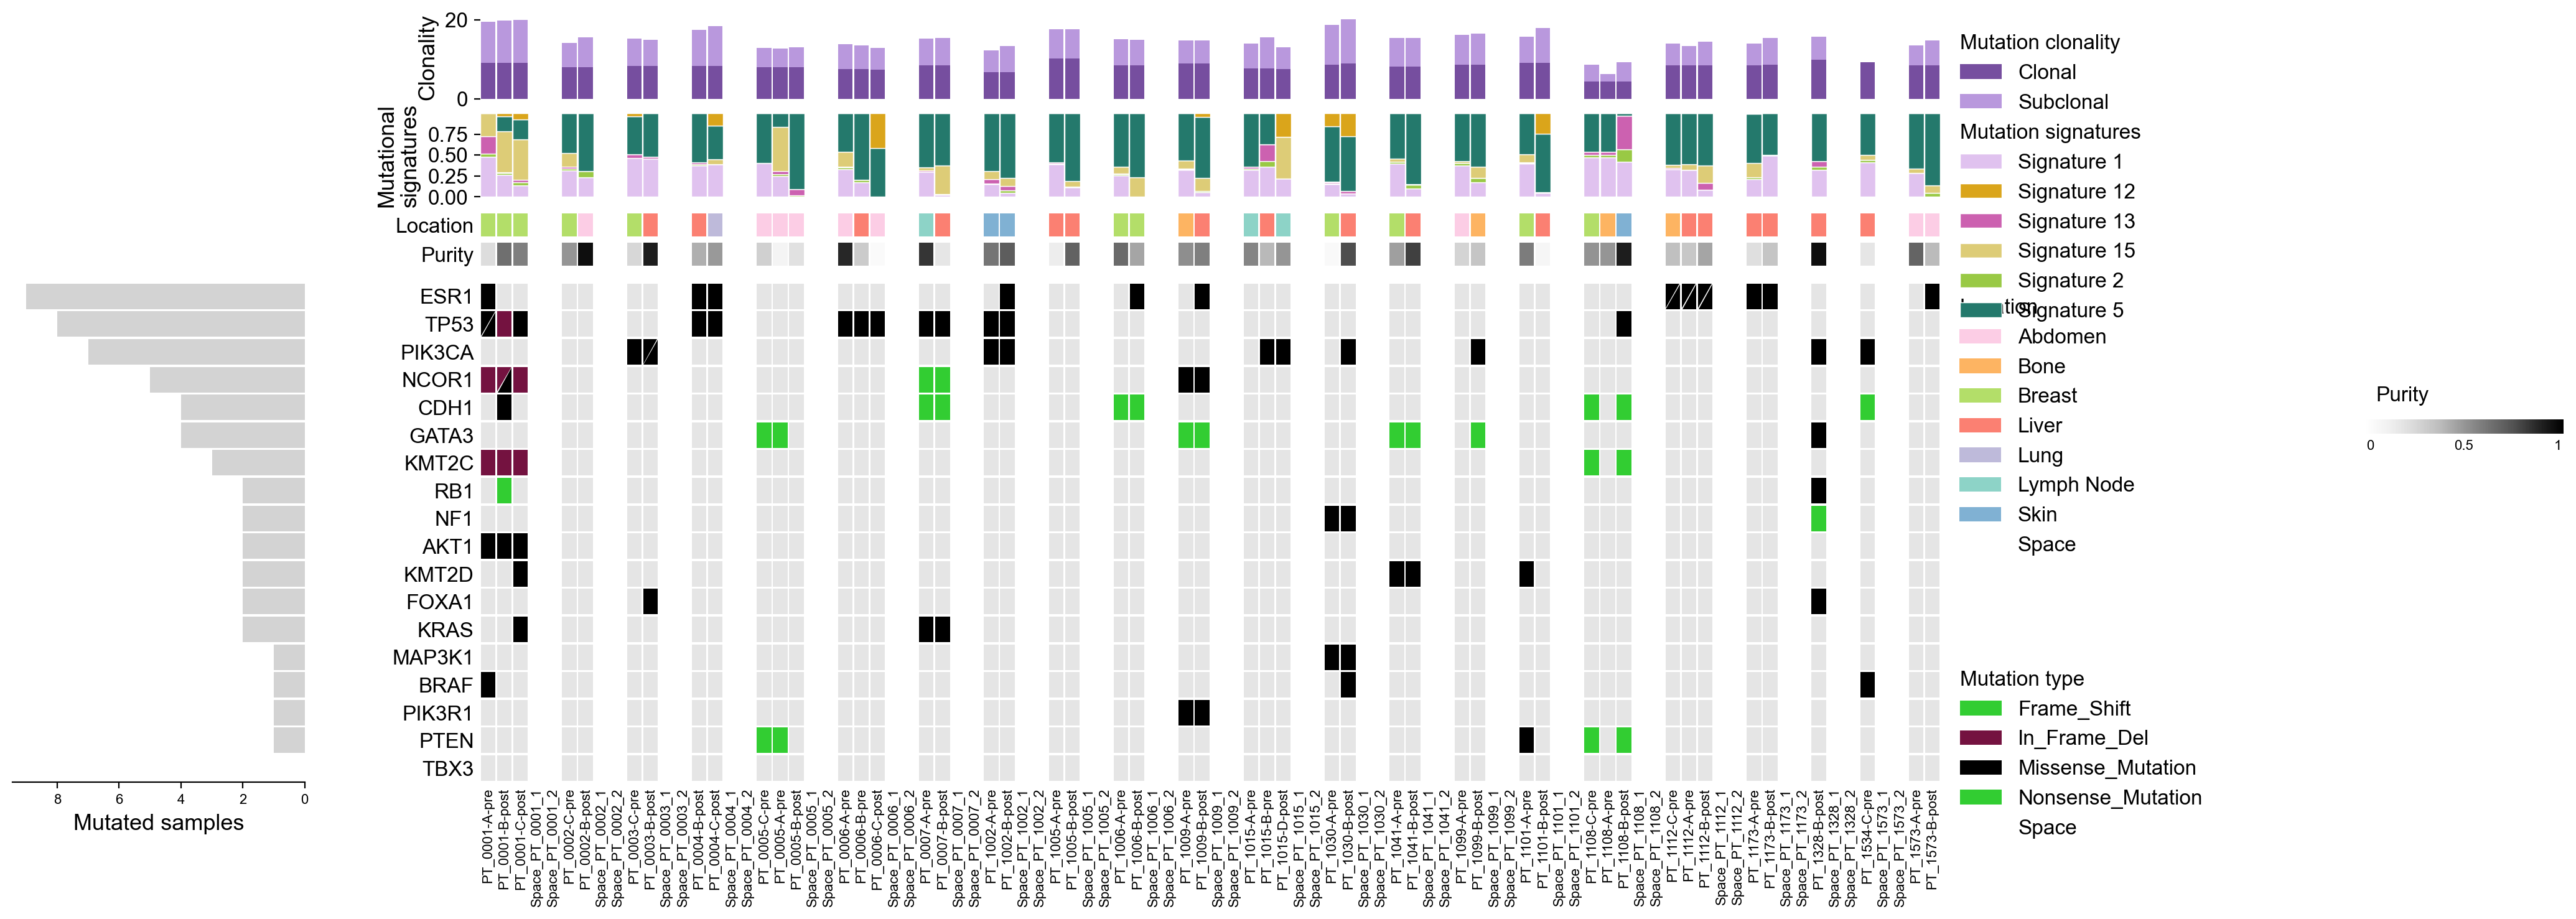

In [11]:

# color bars must be added manually based on figure coordinates - [left, bottom, width, height]
purity_ax = pre_post_comut.figure.add_axes([1.07, 0.46, 0.08, 0.014])

# purity ranges from 0 to 1
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

# create the colorbar with colormap used when the continuous data was added (purp_7)
purity_colorbar = pre_post_comut.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='Greys'),
                                                 cax=purity_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
purity_colorbar.ax.tick_params(size=0)
purity_colorbar.set_ticks([0.03,0.5,0.97])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
purity_colorbar.set_label('Purity', labelpad = -38, x = 0.19, fontsize = 12)

pre_post_comut.figure

In [12]:

percentages = (mutation_freq_data['mutated_samples'] /len(sample_order)*100).round(1).astype(str) + '%'
pre_post_comut.axes['Mutated samples'].set_yticks([0.5, 1.5, 2.5, 3.5, 4.5,5.5,6.5,7.5,8.5,9.5,
                                                 10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5])
pre_post_comut.axes['Mutated samples'].set_yticklabels(list(percentages[::-1]))
pre_post_comut.axes['Mutated samples'].tick_params(axis='y', pad=-34)
pre_post_comut.axes['Mutated samples'].get_yaxis().set_visible(True)
pre_post_comut.axes['Mutated samples'].yaxis.tick_right()



pre_post_comut.axes['Mutated samples'].yaxis.tick_right()

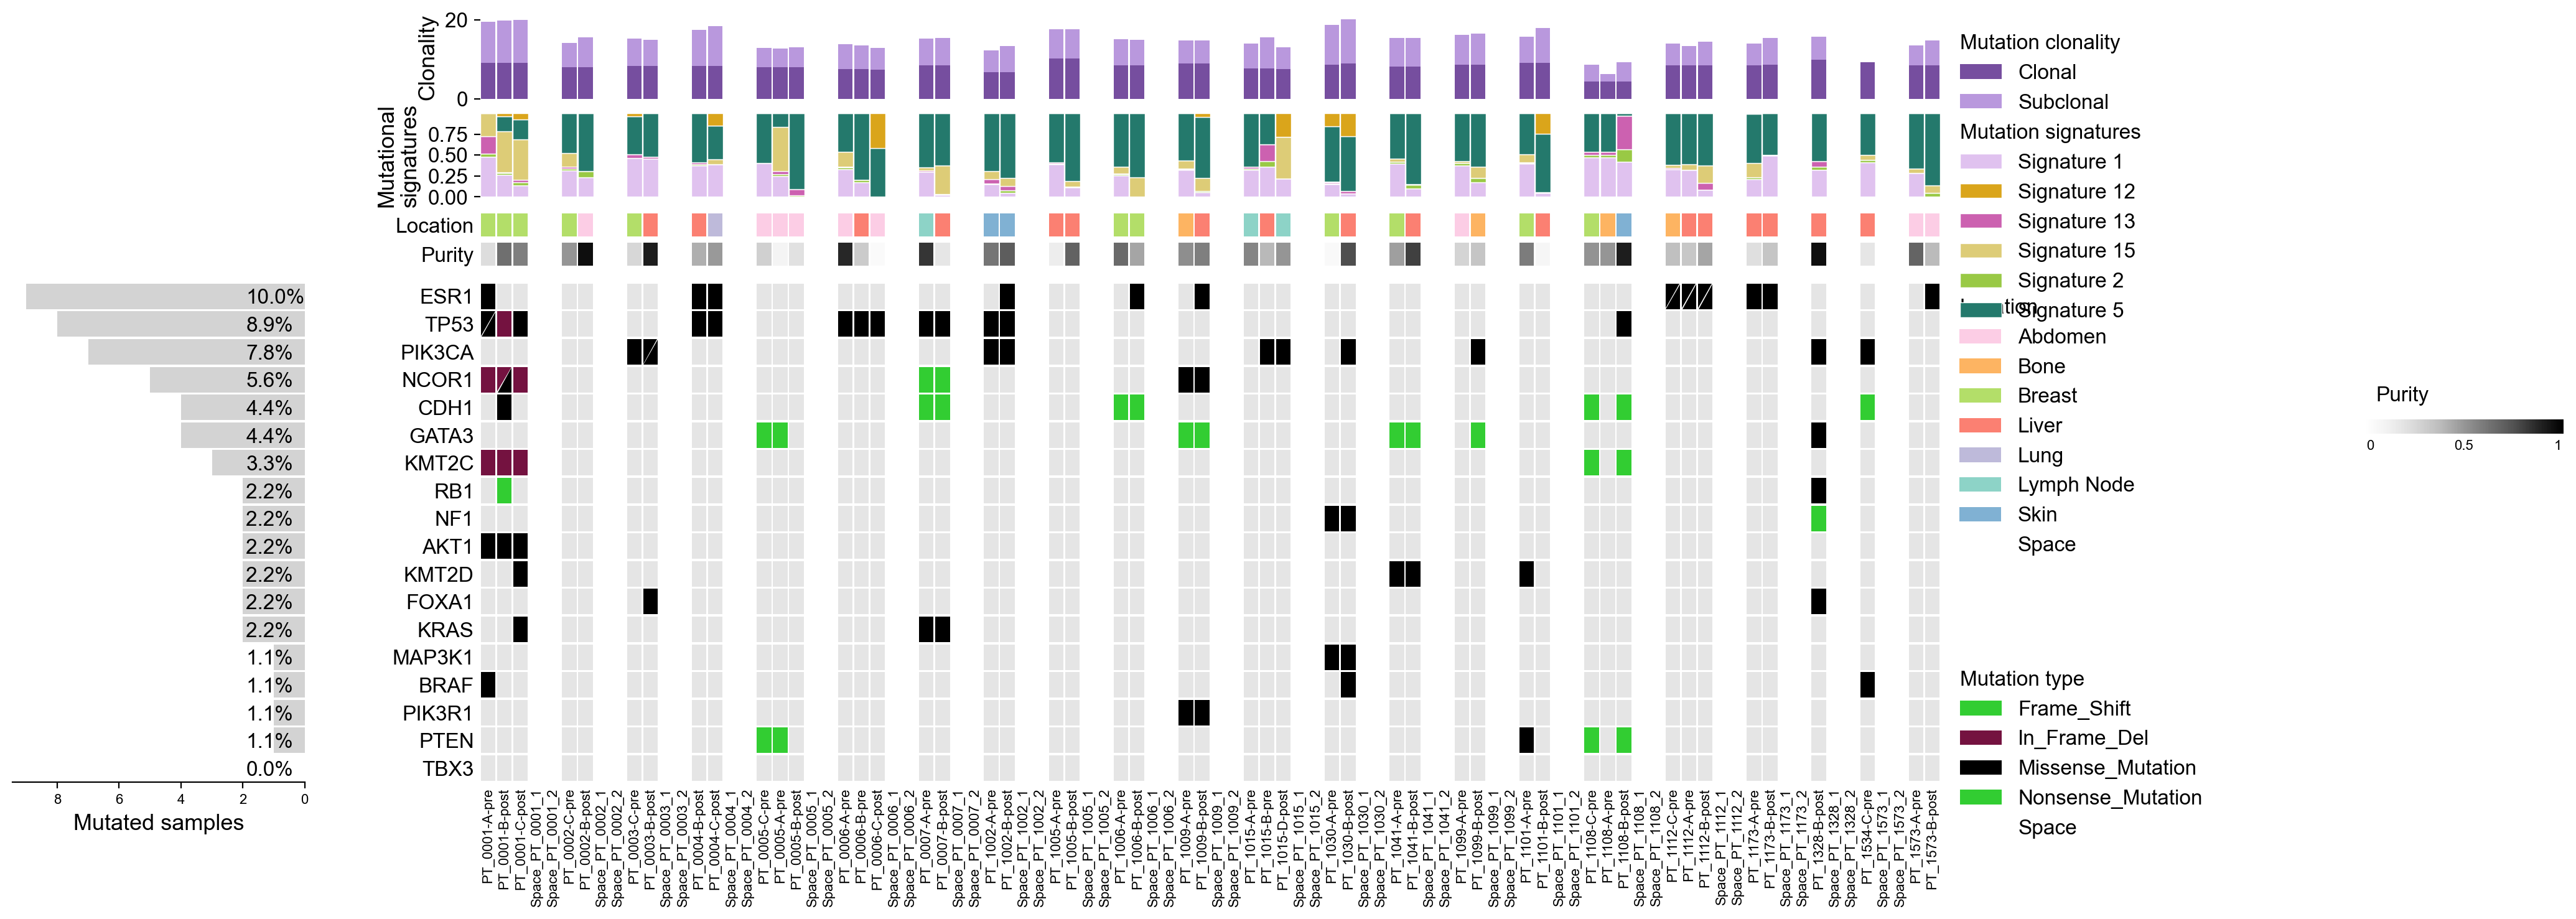

In [13]:
pre_post_comut.figure

In [14]:
pre_post_comut.figure.savefig('Prepost_sample_comut_051325.png', bbox_inches = 'tight', dpi = 300)



In [15]:
pre_post_comut.figure.savefig('Prepost_sample_comut_051325.svg', bbox_inches = 'tight', dpi = 300)



In [17]:
## pre post purity scale in black and white